# Data visualization with pandas
### ...or, how to make matplotlib look a little nicer

- documentation: http://matplotlib.org/api/index.html
- examples: http://matplotlib.org/examples/index.html
- gallery: http://matplotlib.org/gallery.html

Today we'll break down the components and styling of bar charts, line charts, scatter plots, and pie charts. You'll learn the gist of dissecting matplotlib and bending it to your will. Once you've learned how to do all of this, other Python visualization libraries are quite easy to pick up.

There are other nice visualization libraries out there, such as:
- seaborn: https://web.stanford.edu/~mwaskom/software/seaborn/
- bokeh: http://bokeh.pydata.org/en/latest/

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

## load the data sets

In [2]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [3]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [4]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


In [5]:
# define the font styles
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
axis_bgcolor = '#f0f0f0'

## First up: Bar Charts

In [6]:
# get the most visited countries
countries = df['country'].value_counts()
countries

Spain                     646
Portugal                  256
Germany                   225
Czech Republic            130
Poland                    104
Turkey                     94
Greece                     82
Montenegro                 51
Macedonia (FYROM)          34
Croatia                    30
Kosovo                     30
Albania                    29
Bosnia and Herzegovina     26
Serbia                     15
United Kingdom              7
Name: country, dtype: int64

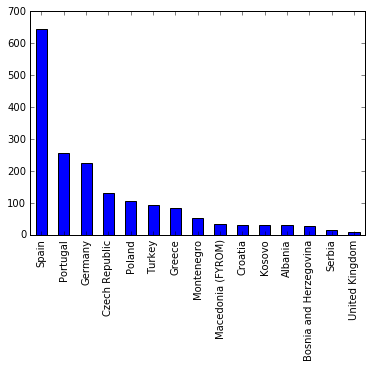

In [7]:
# default matplotlib bar chart
countries.plot(kind='bar')

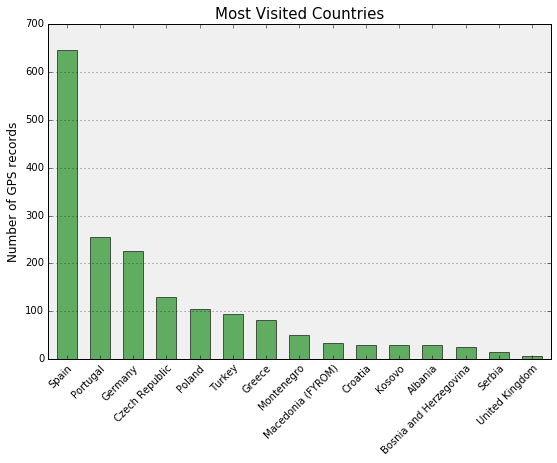

In [8]:
# style the chart to make it look nicer
ax = countries.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
                    color='g', edgecolor='k', grid=False, ylim=[0, 700])

ax.set_xticklabels(countries.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_axis_bgcolor(axis_bgcolor)   
ax.set_title('Most Visited Countries', fontproperties=title_font)
ax.set_xlabel('')
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

Now you try: re-create the plot above, but make the bars orange with maroon edges.

In [9]:
# make a re-usable function to draw nice bar charts
def bar_chart(data, title='', xlabel='', ylabel='', color='k', ylim=None):
    
    ax = data.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
                   color=color, edgecolor='k', grid=False, ylim=ylim)

    ax.set_xticklabels(data.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
    ax.yaxis.grid(True)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)

    ax.set_axis_bgcolor(axis_bgcolor)   
    ax.set_title(title, fontproperties=title_font)
    ax.set_xlabel(xlabel, fontproperties=label_font)
    ax.set_ylabel(ylabel, fontproperties=label_font)

    plt.show()

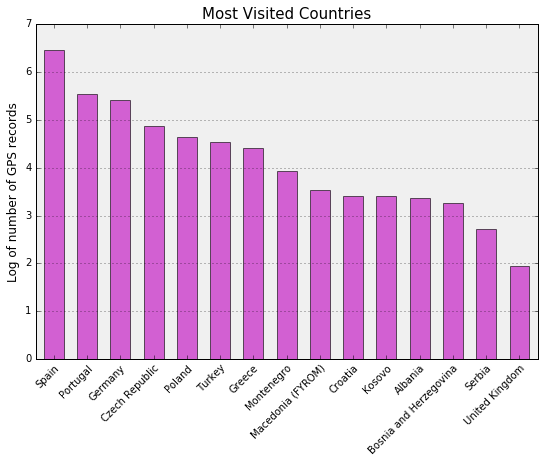

In [10]:
# let's re-scale the data and use our new function
log_countries = np.log(df['country'].value_counts())

bar_chart(data=log_countries, 
          title='Most Visited Countries', 
          ylabel='Log of number of GPS records', 
          color='m', 
          ylim=[0,7])

In [11]:
# do the same thing, but now for the most visited cities instead of countries
cities = df['city'].value_counts().head(13)
cities

Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Athens        67
Porto         58
Krakow        58
Freiburg      54
Kotor         51
Ohrid         34
Prizren       30
Berat         27
Name: city, dtype: int64

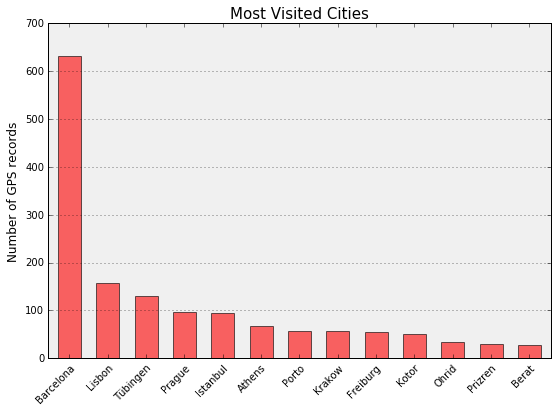

In [12]:
title = 'Most Visited Cities'
ylabel = 'Number of GPS records'
color = 'r'
bar_chart(cities, title=title, ylabel=ylabel, color=color)

Now you try: use our bar_chart() function to create a plot like the one above, but give it an x-axis label and use the cities' log values, like we did earlier for countries.

## Next: scatter plots as simple maps

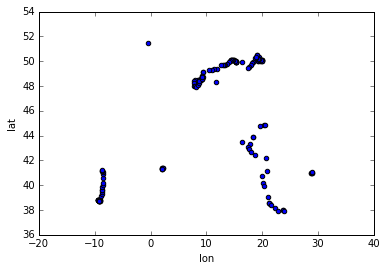

In [13]:
# scatter plot the longitude and latitude data, with matplotlib defaults
rs.plot(kind='scatter', x='lon', y='lat')

In [14]:
# get a single representative point from the data set for each of the most visited cities
most_visited_cities_index = df['city'].value_counts().head(8).index
most_visited_cities = pd.DataFrame(df[df['city'].isin(most_visited_cities_index)])
most_visited_cities.drop_duplicates(subset=['city'], keep='first', inplace=True)
most_visited_cities

,lat,lon,city,country
date,,,,
2014-05-14 15:11:00,38.781775,-9.137544,Lisbon,Portugal
2014-05-17 15:13:00,41.145266,-8.610441,Porto,Portugal
2014-05-19 00:04:00,41.377119,2.151632,Barcelona,Spain
2014-05-30 17:59:00,50.097330,19.895394,Krakow,Poland
2014-06-02 12:10:00,50.087729,14.660600,Prague,Czech Republic
2014-06-06 19:06:00,48.518270,9.058023,Tübingen,Germany
2014-07-05 05:32:00,37.967669,23.729203,Athens,Greece
2014-07-06 20:42:00,40.982352,28.815756,Istanbul,Turkey


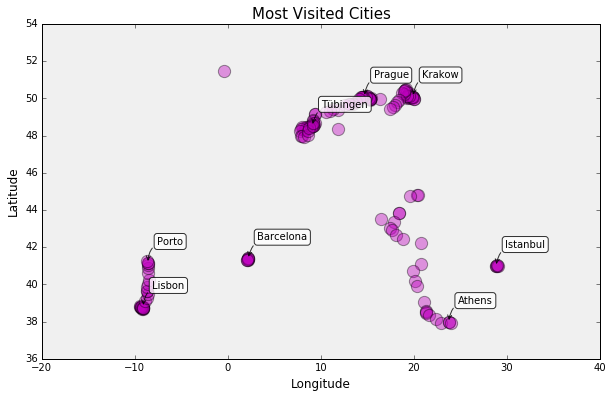

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x=rs['lon'], y=rs['lat'], c='m', edgecolor='k', alpha=.4, s=150)

# set font of tick labels
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

# set title, axis labels, background color
ax.set_title('Most Visited Cities', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)
ax.set_axis_bgcolor(axis_bgcolor)

# annotate each of the most visited cities on the map
bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
annotate_cities = lambda row: ax.annotate(row['city'], 
                                          xy=(row['lon'], row['lat']),
                                          xytext=(row['lon'] + 1, row['lat'] + 1),
                                          fontproperties=annotation_font,
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
most_visited_cities.apply(annotate_cities, axis=1)
    
plt.show()

Now you try: re-create the scatter plot above, but give the points a different size and alpha. Experiment with moving the annotation labels around and changing the arrow style.

## Line charts, with annotation

In [16]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

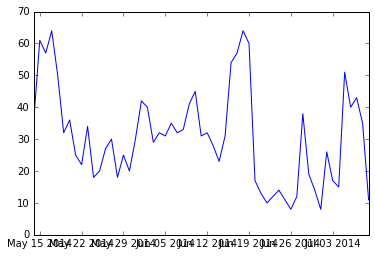

In [17]:
# default matplotlib line chart
countdata.plot(kind='line')

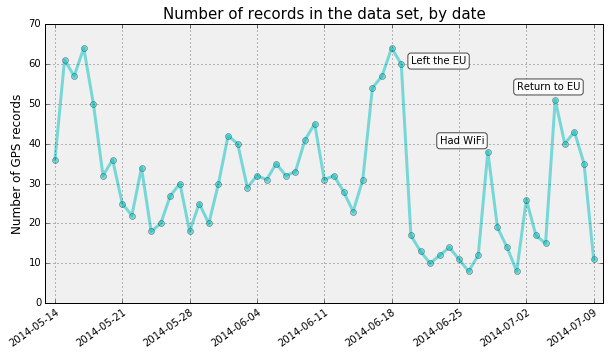

In [18]:
# create a nicer line plot
fig, ax = plt.subplots()
ax = countdata.plot(kind='line',
                    figsize=[10, 5],
                    linewidth='3', 
                    alpha=0.5,
                    marker='o',
                    color='c')

# add annotations for explanation
ax.annotate('Left the EU', 
                 xy=('2014-06-20', 60),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Had WiFi', 
                 xy=('2014-06-23', 40),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Return to EU', 
                 xy=('2014-07-01', 53.5),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

# set the x-ticks/labels for every nth row of the data: 1 tick mark per horizontal inch
n = len(countdata) / int(fig.get_size_inches()[0]) #interval between tick marks
xtick_data = countdata.iloc[range(0, len(countdata), 7)] #rows spaced apart by that interval (ie, weekly)
ax.xaxis.set_ticks(xtick_data.index) #set the tick labels as the dates of those rows
ax.set_xlim(['2014-05-13', '2014-07-10'])

ax.xaxis.grid(True)
ax.yaxis.grid(True)

# set tick labels, axis labels, and title
ax.set_xticklabels(xtick_data.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Number of records in the data set, by date', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)
ax.set_axis_bgcolor(axis_bgcolor)

plt.show()

Now you try: re-create the plot above with different line widths, colors, and point markers. Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.

After class, experiment with a more advanced challenge like smoothing the line:
- https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
- https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

## Pie charts

In [19]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

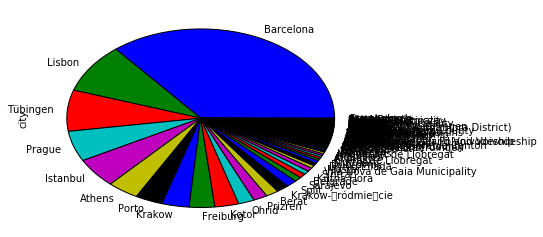

In [20]:
# draw a pie chart nightmare
cities.plot(kind='pie')

In [21]:
# function to produce more beautiful pie charts with matplotlib
def pie_chart(fractions, #values for the wedges
              labels, #labels for the wedges
              title = '', #title of the pie chart
              cm_name = 'Pastel1', #name of the matplotlib colormap to use
              autopct = lambda x: str(round(x, 1)) + '%', #format the value text on each pie wedge
              labeldistance = 1.05, #where to place wedge labels in relation to pie wedges
              shadow = True, #shadow around the pie
              startangle = 90, #rotate 90 degrees to start the top of the data set on the top of the pie
              edgecolor = 'w', #color of pie wedge edges
              width = 8, #width of the figure in inches
              height = 8, #height of the figure in inches
              grouping_threshold = None, #group all wedges below this value into one 'all others' wedge
              grouping_label = None): #what to label the grouped wedge
    
    # if the user passed a threshold value, group all fractions lower than it into one 'misc' pie wedge
    if not grouping_threshold==None:
        
        # if user didn't pass a label, apply a default text
        if grouping_label == None:
            grouping_label = 'Others'

        # select the rows greater than the cut-off value
        row_mask = fractions > grouping_threshold
        meets_threshold = fractions[row_mask]

        # group all other rows below the cut-off value
        all_others = pd.Series(fractions[~row_mask].sum())
        all_others.index = [grouping_label]

        # append the grouped row to the bottom of the rows to display
        fractions = meets_threshold.append(all_others)
        labels = fractions.index
    
    # get the color map then pull 1 color from it for each pie wedge we'll draw
    color_map = cm.get_cmap(cm_name)
    num_of_colors = len(fractions)
    colors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])
    
    # create the figure and an axis to plot on
    fig, ax = plt.subplots(figsize=[width, height])
    
    # plot the pie
    wedges = ax.pie(fractions, 
                    labels = labels, 
                    labeldistance = labeldistance,
                    autopct = autopct,
                    colors = colors,
                    shadow = shadow, 
                    startangle = startangle)
    
    # change the edgecolor for each wedge
    for wedge in wedges[0]:
        wedge.set_edgecolor(edgecolor)
    
    # set the title and show the plot
    ax.set_title(title, fontproperties=title_font)
    plt.show()

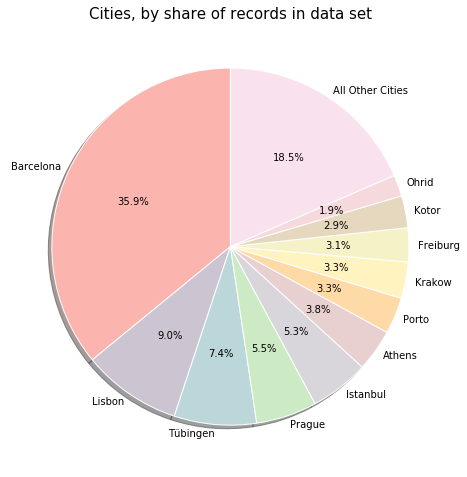

In [22]:
cities = df['city'].value_counts()

# test out our function
pie_chart(fractions = cities,
          labels = cities.index,
          title = 'Cities, by share of records in data set',
          grouping_threshold = 30,
          grouping_label = 'All Other Cities')

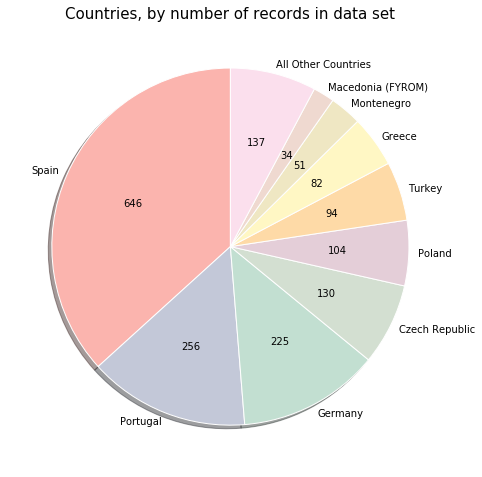

In [23]:
countries = df['country'].value_counts()

# convert the pie wedge percentage into its absolute value (instead of percent share)
def my_autopct(pct):
    total = sum(countries)
    return int(round((pct * total) / 100.))

# test out our function
pie_chart(fractions = countries,
          labels = countries.index,
          title = 'Countries, by number of records in data set',
          autopct=my_autopct,
          grouping_threshold = 30,
          grouping_label = 'All Other Countries')